<a href="https://colab.research.google.com/github/vineetbiostats/AI4PH-thesis-project/blob/main/AI4PH_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
SEED = 101

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vineetbiostats/AI4PH-thesis-project/main/mldata.csv",sep=",",error_bad_lines=False)
df.head()

,seqn,obesity,gender,race,birthplace,hhsize1,noofc5ory,noofc6to17,hhedu1,hrmar1,hhinc1,mothage_born,mothsmok_born,weight_born1,svar,hhedu2
0,83738,0,2,1,1,5,0,2,1.0,2,2,1,1,0,1,1
1,83739,0,1,3,1,5,2,1,5.0,1,4,1,0,0,1,5
2,83743,1,1,5,1,3,0,0,5.0,1,4,0,0,0,1,5
3,83745,1,2,3,1,3,0,2,4.0,3,1,1,1,0,1,4
4,83746,0,2,5,2,4,1,1,NaN,1,1,2,0,0,1,5


In [ ]:
# 2. General description of the dataset.
print ('Rows     : ', df.shape[0])
print ('Coloumns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nNumber of Missing values:  ', df.isnull().sum().values.sum())
print ('\nNumber of unique values :  \n', df.nunique())


Rows     :  3340
Coloumns  :  16

Features : 
 ['seqn', 'obesity', 'gender', 'race', 'birthplace', 'hhsize1', 'noofc5ory', 'noofc6to17', 'hhedu1', 'hrmar1', 'hhinc1', 'mothage_born', 'mothsmok_born', 'weight_born1', 'svar', 'hhedu2']

Number of Missing values:   119

Number of unique values :  
 seqn             3340
obesity             2
gender              2
race                5
birthplace          2
hhsize1             5
noofc5ory           4
noofc6to17          5
hhedu1              5
hrmar1              4
hhinc1              4
mothage_born        3
mothsmok_born       2
weight_born1        2
svar                2
hhedu2              3
dtype: int64


In [ ]:
##number of missing values in each variable(feature)
df.isnull().sum()

seqn               0
obesity            0
gender             0
race               0
birthplace         0
hhsize1            0
noofc5ory          0
noofc6to17         0
hhedu1           119
hrmar1             0
hhinc1             0
mothage_born       0
mothsmok_born      0
weight_born1       0
svar               0
hhedu2             0
dtype: int64

In [ ]:
df1 = pd.DataFrame(df, columns = ['gender', 'race', 'birthplace', 'hhsize1', 'noofc5ory', 'noofc6to17', 'hrmar1', 'hhinc1', 'hhedu2', 'mothage_born', 'mothsmok_born', 'weight_born1', 'obesity'])
df1.head()

,gender,race,birthplace,hhsize1,noofc5ory,noofc6to17,hrmar1,hhinc1,hhedu2,mothage_born,mothsmok_born,weight_born1,obesity
0,2,1,1,5,0,2,2,2,1,1,1,0,0
1,1,3,1,5,2,1,1,4,5,1,0,0,0
2,1,5,1,3,0,0,1,4,5,0,0,0,1
3,2,3,1,3,0,2,3,1,4,1,1,0,1
4,2,5,2,4,1,1,1,1,5,2,0,0,0


0    0.636826
1    0.363174
Name: obesity, dtype: float64


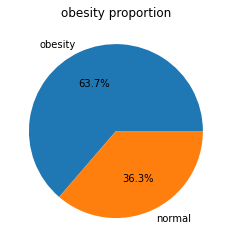

In [ ]:
#procedure for pie chart
proportion = df1['obesity'].value_counts() / df1.obesity.count()
print (proportion)
label = ['obesity', 'normal']

plt.pie(proportion,labels = label,autopct='%1.1f%%')

plt.title('obesity proportion')
plt.show()

In [ ]:
#Split the data set into input features, X, and targe feature, y
X, y = df1.drop('obesity', axis=1), df1['obesity']
print(X.shape, y.shape)

# type(X)   # pandas.core.frame.DataFrame
# type(y)   # pandas.core.series.Series

(3340, 12) (3340,)


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)

X_scaled (3340, 12)


In [ ]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X_man_mix = scaler.transform(X)
print('X_man_mix', X_man_mix.shape)

X_man_mix (3340, 12)


In [ ]:
 #split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)

X_train (2672, 12)
y_train (2672,)
X_test (668, 12)


In [ ]:
from sklearn import svm
clf = svm.SVC() # We declare the estimator with its hyperparameters
clf.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf.predict(X_test)

In [ ]:
clf.kernel #hyperparameters
clf.support_ #learned parameters

array([   1,    2,    5, ..., 2665, 2670, 2671], dtype=int32)

[[1653   49]
 [ 833  137]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


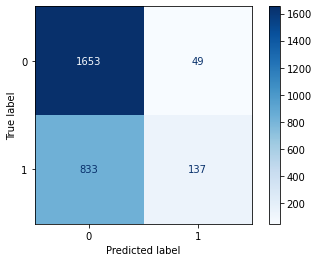

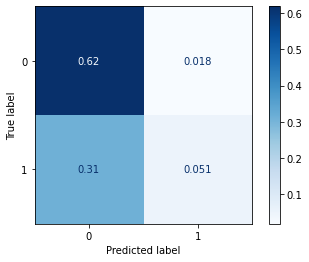

In [ ]:
#Model evaluation
# in training data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_train)

cf_matrix = confusion_matrix(y_train, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_train, y_train, cmap='Blues')  

plot_confusion_matrix(clf, X_train, y_train, cmap='Blues', normalize = 'all')  

[[411  14]
 [215  28]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


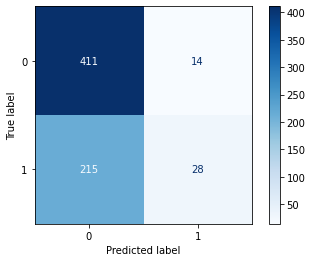

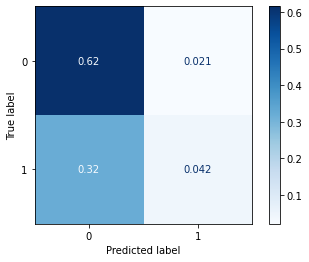

In [ ]:
# in test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize = 'all')  

In [ ]:

#Quality measures
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.657185628742515

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.5690794683855785

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

0.6602298597692794

[0.         0.03294118 1.        ]
[0.         0.11522634 1.        ]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


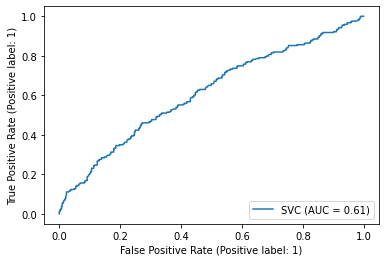

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

0.5411425804889857


In [ ]:
#Improving the model : Tunning the hyper-parameters
clf_poly = svm.SVC(kernel = 'poly', C = 1, degree = 3, class_weight = 'balanced') # We declare the estimator with its hyperparameters
clf_poly.fit(X_train, y_train) #We call the estimator to learn the parameters from the training dataset
y_pred = clf_poly.predict(X_test)
auc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

In [ ]:
f1_score

0.5929832589435585

In [ ]:
auc_score

0.585122246429436

In [ ]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(rnd_clf, accuracy_score(y_test, y_pred))

RandomForestClassifier(max_leaf_nodes=16, n_estimators=10, n_jobs=-1) 0.6392215568862275


[[416   9]
 [229  14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


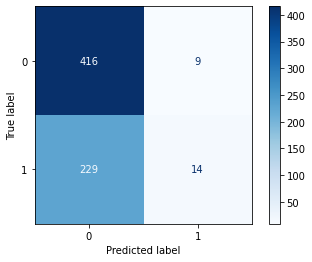

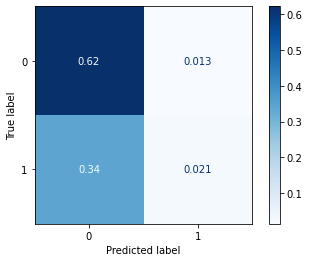

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = rnd_clf.predict(X_test)

rnd_cf_matrix = confusion_matrix(y_test, y_pred)

print(rnd_cf_matrix)

plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='Blues', normalize = 'all')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.5330033489342024

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

0.6317688182785087

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

0.5182183490680223


[0.         0.20705882 1.        ]
[0.         0.37037037 1.        ]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


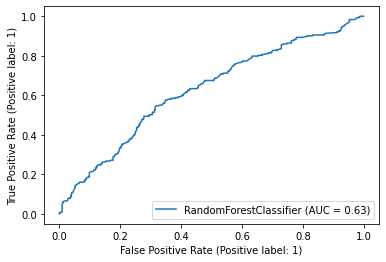

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(rnd_clf, X_test, y_test)  
plt.show() 

In [ ]:
forest_importances = pd.Series(rnd_clf.feature_importances_,index=["gender", "race", "birthplace", "hhsize1", "noofc5ory", "noofc6to17", "hrmar1", "hhinc1", "hhedu2", "mothage_born", "mothsmok_born", "weight_born1",])
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances

race             0.188021
hhedu2           0.119939
hhinc1           0.118846
noofc5ory        0.109065
hhsize1          0.101156
mothage_born     0.084476
birthplace       0.081543
noofc6to17       0.067929
hrmar1           0.053816
weight_born1     0.036505
mothsmok_born    0.032086
gender           0.006618
dtype: float64

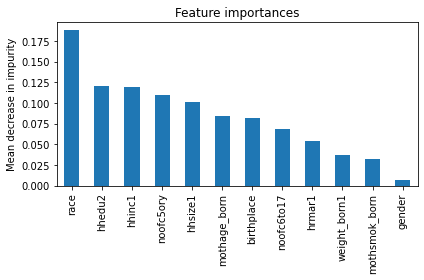

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#Ada boost classifier
#bagging
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=3), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(ada_clf, accuracy_score(y_test, y_pred))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=0) 0.6392215568862275


[[337  88]
 [153  90]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


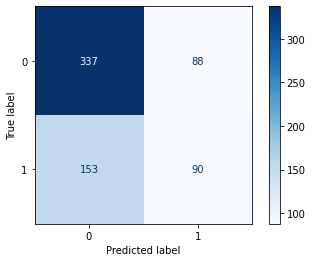

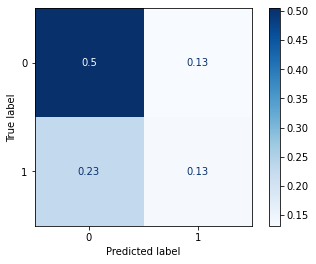

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


y_pred = ada_clf.predict(X_test)

ada_cf_matrix = confusion_matrix(y_test, y_pred)

print(ada_cf_matrix)

plot_confusion_matrix(ada_clf, X_test, y_test, cmap='Blues')  

plot_confusion_matrix(ada_clf, X_test, y_test, cmap='Blues', normalize = 'all')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6241850242896475

In [ ]:
 from sklearn.metrics import precision_score
 precision_score(y_test, y_pred, average='weighted')

0.6214986330938215

In [ ]:
auc_scoreauc_score = metrics.roc_auc_score(y_test, y_pred, average='weighted')
print(auc_scoreauc_score)

0.5816557734204794


[0.         0.20705882 1.        ]
[0.         0.37037037 1.        ]
[2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


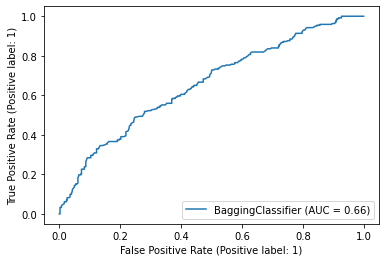

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)
metrics.plot_roc_curve(bag_clf, X_test, y_test)  
plt.show() 

In [ ]:
ada_importances = pd.Series(ada_clf.feature_importances_,index=["gender", "race", "birthplace", "hhsize1", "noofc5ory", "noofc6to17", "hrmar1", "hhinc1", "hhedu2", "mothage_born", "mothsmok_born", "weight_born1"])
ada_importances.sort_values(ascending=False,inplace=True)
ada_importances

race             0.135323
hhsize1          0.131040
hrmar1           0.119497
hhinc1           0.117366
noofc6to17       0.103722
noofc5ory        0.093833
mothage_born     0.072294
hhedu2           0.068832
mothsmok_born    0.049803
gender           0.048534
weight_born1     0.032715
birthplace       0.027040
dtype: float64

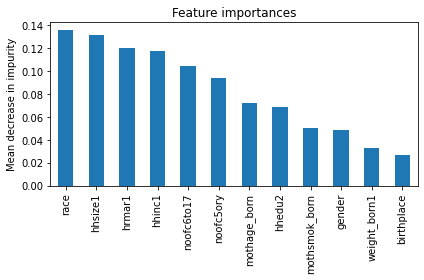

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ada_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()